In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action = 'ignore')

In [21]:
df = pd.read_csv('서울시 도로노선 정보.csv',encoding = 'cp949')
df.head()

,순번,노선명(도로명),도로종류,도로기능,도로규모,도로폭,시도구도구분
0,1,가락로,일반도로,국지도로,소로2류,폭8-10m,구도
1,2,가락로11길,일반도로,국지도로,소로3류,폭6-8m,구도
2,3,가락로12길,일반도로,국지도로,소로2류,폭8-10m,구도
3,4,가락로13길,일반도로,국지도로,소로,6m미만,구도
4,5,가락로15길,일반도로,국지도로,소로,6m미만,구도


In [22]:
df1 = pd.read_csv('서울특별시 광진구_불법주정차 위반 단속 CCTV 위치정보_20220502.csv',encoding = 'cp949')
df1.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역


In [24]:
df2 = pd.read_csv('서울특별시 광진구_주정차단속현황_20230331.csv',encoding = 'cp949')
df2.head()

,단속일시,과태료,단속지역,단속장소,위반내용,견인지시,단속구분
0,2015-01-01 06:44,32000,화양동,119-4,주정차금지,견인처리,PDA
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
2,2015-01-01 07:24,40000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,CCTV
3,2015-01-01 08:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
4,2015-01-01 08:15,32000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV


* 도로폭 = 도로 규모
> 도로규모로 판단 진행

* 광장동

In [25]:
gwangjin_2022 = df2[df2['단속일시'].str.slice(0,4) == '2022']
gwangjin_2023 = df2[df2['단속일시'].str.slice(0,4) == '2023']
gwangjin_2022 = gwangjin_2022[gwangjin_2022['단속지역'].isin(['광장동'])]
gwangjin_2023 = gwangjin_2023[gwangjin_2023['단속지역'].isin(['광장동'])]

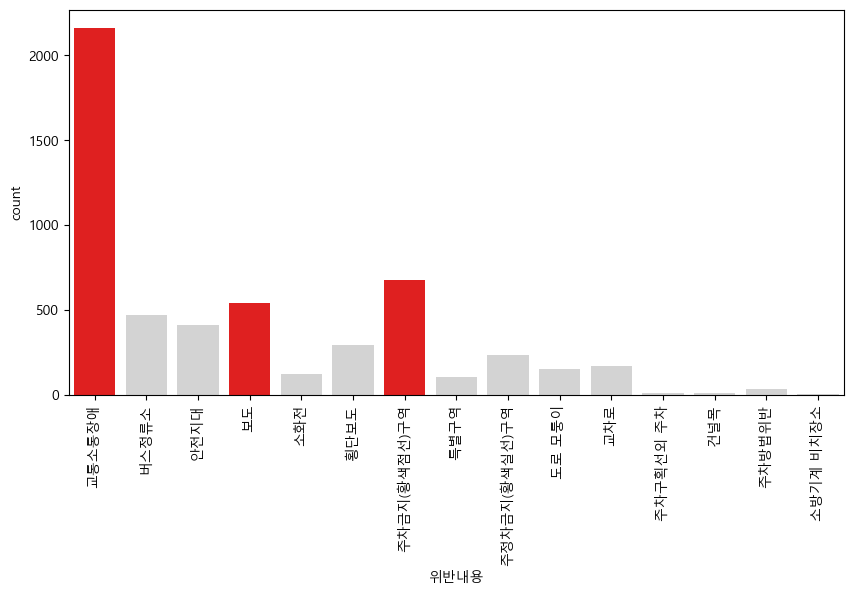

In [38]:
plt.figure(figsize = (10, 5))
palette = ['#ff0000', '#D3D3D3', '#D3D3D3', '#ff0000', '#D3D3D3', '#D3D3D3', '#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
plt.xticks(rotation = 90)
sns.countplot(x = gwangjin_2022['위반내용'], palette = palette)
plt.show()

* 교통소통장애 - 교통량이 많은 도로에서 자동차 등이 급정거, 불법주정차, 신호위반 등으로 인해 교통이 원활하지 않아 다른 차량들이 움직이기 어려운 상황에서, 이를 방지하기 위해 실시하는 단속
* 주차금지(황색점선)구역
* 보도 구역

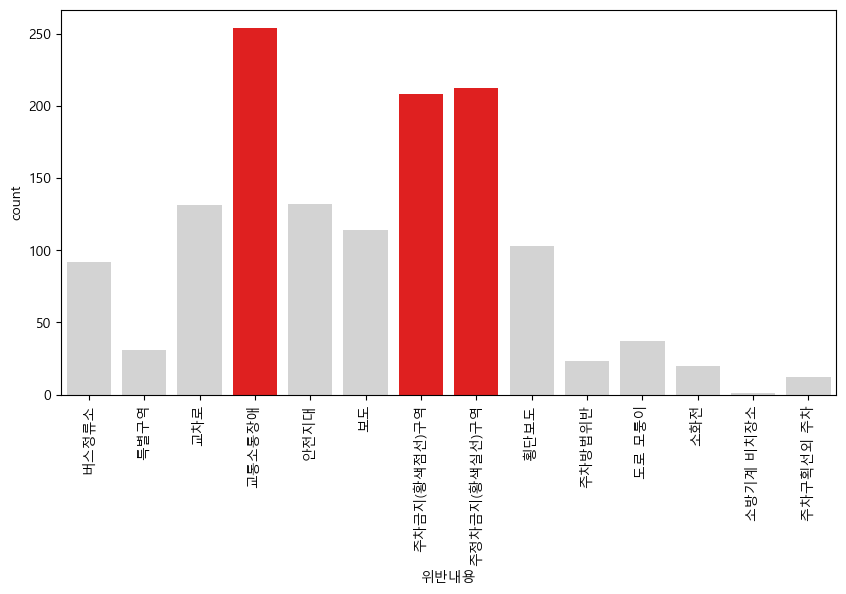

In [61]:
plt.figure(figsize = (10, 5))
palette = ['#D3D3D3', '#D3D3D3', '#D3D3D3', '#ff0000', '#D3D3D3', '#D3D3D3', '#ff0000', '#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
plt.xticks(rotation = 90)
sns.countplot(x = gwangjin_2023['위반내용'], palette = palette)
plt.show()

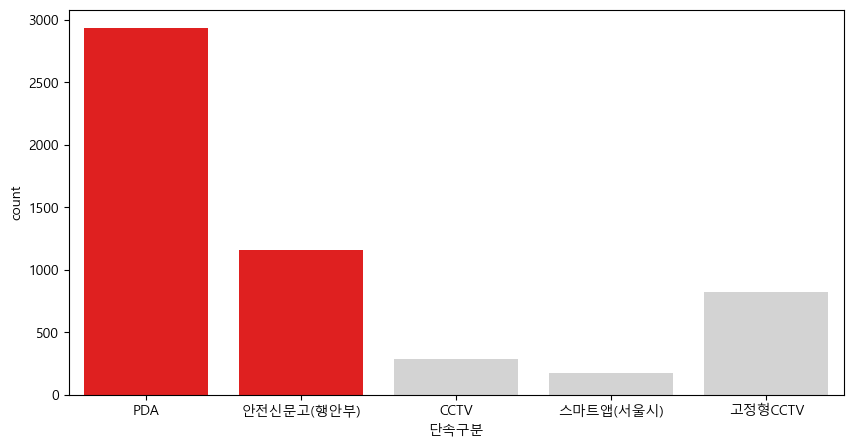

In [62]:
plt.figure(figsize = (10, 5))
palette = ['#ff0000', '#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3']
sns.countplot(x = gwangjin_2022['단속구분'], palette = palette)
plt.show()

* PDA : 경찰관 단속 / 안전신문고(행안부)

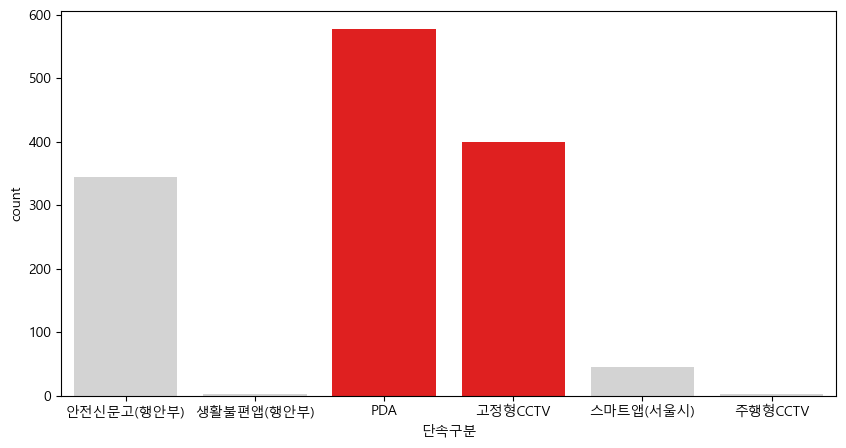

In [75]:
plt.figure(figsize = (10, 5))
palette = ['#D3D3D3', '#D3D3D3', '#ff0000', '#ff0000', '#D3D3D3', '#D3D3D3']
sns.countplot(x = gwangjin_2023['단속구분'], palette = palette)
plt.show()

In [51]:
gwangjin_2022_PDA = gwangjin_2022[gwangjin_2022['단속구분'].isin(['PDA'])]
gwangjin_2022_warn = gwangjin_2022[gwangjin_2022['단속구분'].isin(['안전신문고(행안부)'])]
gwangjin_2023_PDA = gwangjin_2023[gwangjin_2023['단속구분'].isin(['PDA'])]
gwangjin_2023_warn = gwangjin_2023[gwangjin_2023['단속구분'].isin(['안전신문고(행안부)'])]

In [52]:
gwangjin_2022_warn_sort = gwangjin_2022_warn.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2022_PDA_sort = gwangjin_2022_PDA.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2023_warn_sort = gwangjin_2023_warn.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2023_PDA_sort = gwangjin_2023_PDA.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)

* 기준 - 일주일에 1번 이상 단속

In [111]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_sort[gwangjin_2022_warn_sort['위반내용'] >= 52]
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_sort[gwangjin_2022_PDA_sort['위반내용'] >= 52]
gwangjin_2023_warn_mean = gwangjin_2023_warn_sort[gwangjin_2023_warn_sort['위반내용'] >= 13]
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_sort[gwangjin_2023_PDA_sort['위반내용'] >= 13]

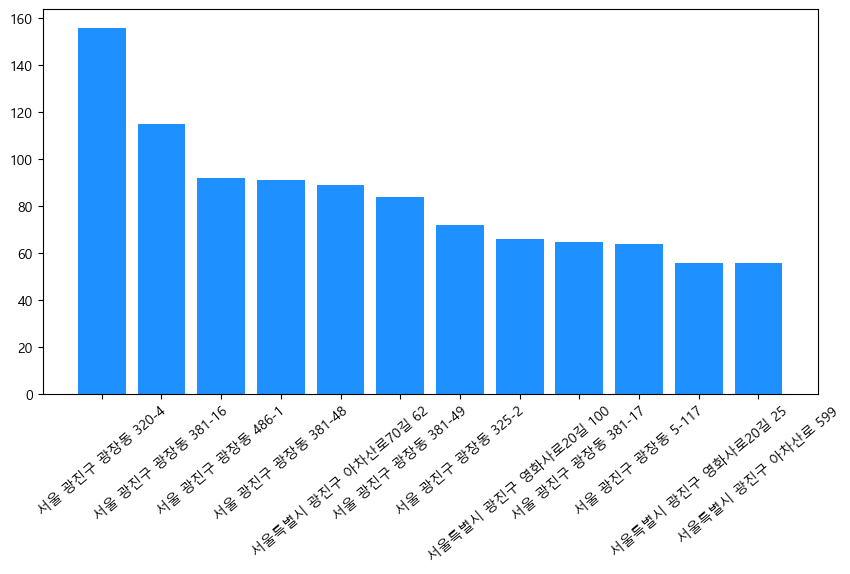

In [114]:
plt.figure(figsize = (10, 5))
plt.bar(x = gwangjin_2022_PDA_mean['단속장소'], height = gwangjin_2022_PDA_mean['위반내용'], color='dodgerblue')
plt.xticks(rotation = 90)
plt.show()

In [115]:
gwangjin_2022_warn_mean

,단속장소,위반내용
126,486-1,222
123,484,125
114,453-7,71
64,320-4,61


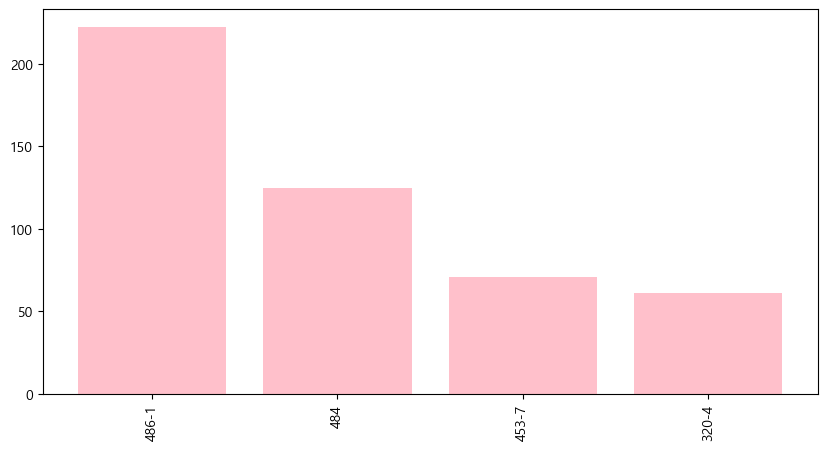

In [113]:
plt.figure(figsize = (10, 5))
plt.bar(x = gwangjin_2022_warn_mean['단속장소'], height = gwangjin_2022_warn_mean['위반내용'], color='pink')
plt.xticks(rotation = 90)
plt.show()

* 좌표에 대한 Folium 사용하여 위치 확인

> 좌표와 CCTV 설치 구역을 비교해서 우선적인 추가 장소 파악

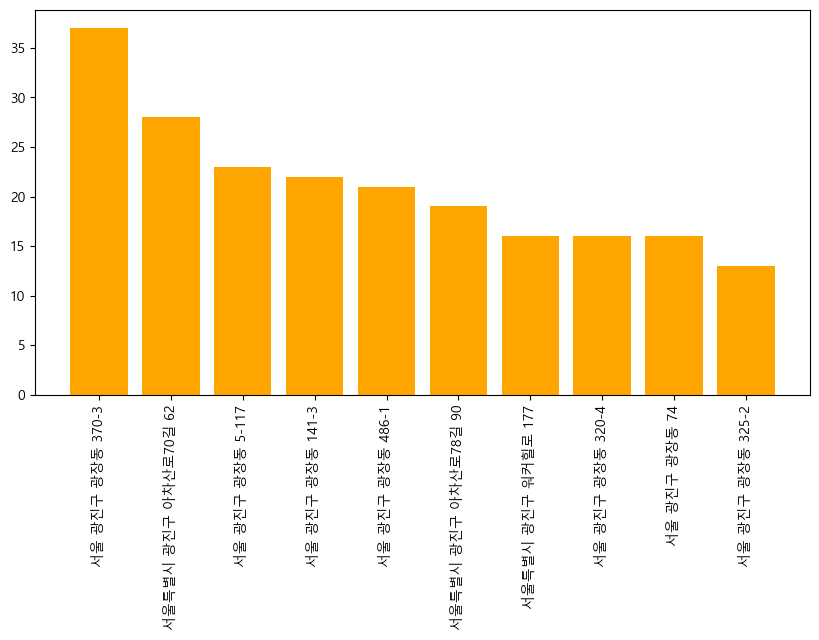

In [110]:
plt.figure(figsize = (10, 5))
plt.bar(x = gwangjin_2023_PDA_mean['단속장소'], height = gwangjin_2023_PDA_mean['위반내용'], color='orange')
plt.xticks(rotation = 90)
plt.show()

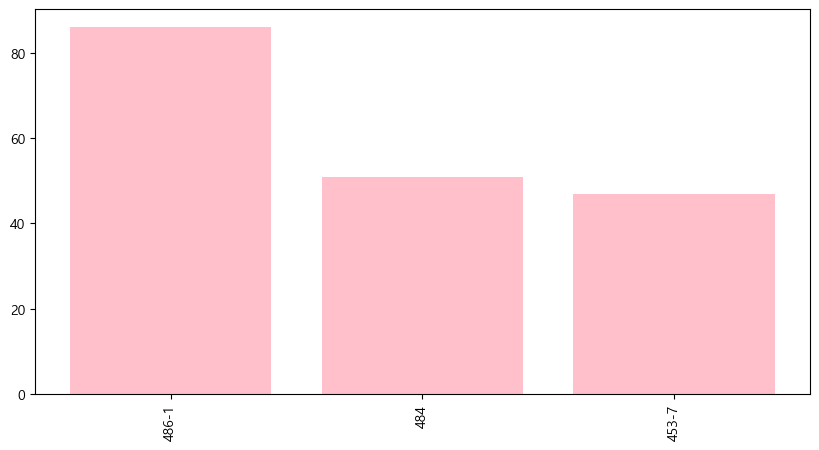

In [116]:
plt.figure(figsize = (10, 5))
plt.bar(x = gwangjin_2023_warn_mean['단속장소'], height = gwangjin_2023_warn_mean['위반내용'], color='pink')
plt.xticks(rotation = 90)
plt.show()

* CCTV가 설치되어 있는 위치 데이터셋 추가

In [68]:
df1.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역


In [69]:
df1['행정동'] = ''

In [70]:
for i in range(len(df1['고정형CCTV지번주소'])):
    df1['행정동'][i] = df1['고정형CCTV지번주소'][i].split(' ')[2]

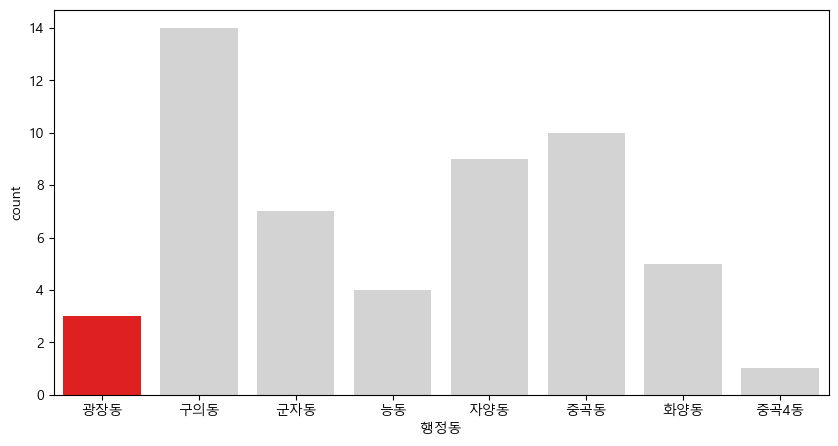

In [72]:
plt.figure(figsize = (10, 5))
palette = ['#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
sns.countplot(df1['행정동'], palette = palette)
plt.show()

In [117]:
gwangjang = df1[df1['행정동'] == '광장동']

In [119]:
gwangjang = gwangjang.reset_index(drop = True)
gwangjang

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,행정동
0,서울 광진구 광장동 334-2,37.547790,127.10699,광진구,모두투어앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.10241,광진구,광현교회 앞,불법주정차구역,광장동
2,서울 광진구 광장동 565,37.541929,127.09967,광진구,광장 힐스테이 상가 건너편,불법주정차구역,광장동


In [120]:
gwangjang.loc[3] = ['아차산로76길 11', 37.547659, 127.107739, '광진구','장순루 사거리', '불법주차구역', '광장동']
gwangjang.loc[4] = ['아차산로69길 8', 37.542424, 127.098331, '광진구','어광수의원 앞', '불법주차구역', '광장동']
gwangjang.loc[5] = ['영화사로 중간지대', 37.552598, 127.099636, '광진구','아차산 등반로', '불법주차구역', '구의2동(광장동)']

In [121]:
gwangjang

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,행정동
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역,광장동
2,서울 광진구 광장동 565,37.541929,127.099670,광진구,광장 힐스테이 상가 건너편,불법주정차구역,광장동
3,아차산로76길 11,37.547659,127.107739,광진구,장순루 사거리,불법주차구역,광장동
4,아차산로69길 8,37.542424,127.098331,광진구,어광수의원 앞,불법주차구역,광장동
5,영화사로 중간지대,37.552598,127.099636,광진구,아차산 등반로,불법주차구역,구의2동(광장동)


장순루 사거리(아차산로76길 11, 광장동) 37.547659, 127.107739

어광수의원 앞(아차산로69길 8, 광장동) 37.542424, 127.098331

아차산 등반로(영화사로 중간지대, 구의2동) 37.552598, 127.099636

https://blog.naver.com/dbilbo/223023553071

* 고정용 CCTV와 관련

In [125]:
gwangjin_2022_warn_mean

,단속장소,위반내용
126,486-1,222
123,484,125
114,453-7,71
64,320-4,61


In [126]:
gwangjin_2022_warn_mean['단속장소'] = '서울 광진구 광장동 ' + gwangjin_2022_warn_mean['단속장소']

* 도로명 주소 : PDA
* 486-1과 같이 숫자로 입력 : 안전신문고

In [127]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_mean.reset_index(drop = True)
gwangjin_2022_warn_mean

,단속장소,위반내용
0,서울 광진구 광장동 486-1,222
1,서울 광진구 광장동 484,125
2,서울 광진구 광장동 453-7,71
3,서울 광진구 광장동 320-4,61


In [128]:
gwangjin_2023_warn_mean = gwangjin_2023_warn_mean.reset_index(drop = True)
gwangjin_2023_warn_mean

,단속장소,위반내용
0,486-1,86
1,484,51
2,453-7,47


* 2022 - 2023의 차이가 없음

In [129]:
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_mean.reset_index(drop = True)
gwangjin_2022_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 320-4,156
1,서울 광진구 광장동 381-16,115
2,서울 광진구 광장동 486-1,92
3,서울 광진구 광장동 381-48,91
4,서울특별시 광진구 아차산로70길 62,89
5,서울 광진구 광장동 381-49,84
6,서울 광진구 광장동 325-2,72
7,서울특별시 광진구 영화사로20길 100,66
8,서울 광진구 광장동 381-17,65
9,서울 광진구 광장동 5-117,64


In [130]:
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_mean.reset_index(drop = True)
gwangjin_2023_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 370-3,37
1,서울특별시 광진구 아차산로70길 62,28
2,서울 광진구 광장동 5-117,23
3,서울 광진구 광장동 141-3,22
4,서울 광진구 광장동 486-1,21
5,서울특별시 광진구 아차산로78길 90,19
6,서울특별시 광진구 워커힐로 177,16
7,서울 광진구 광장동 320-4,16
8,서울 광진구 광장동 74,16
9,서울 광진구 광장동 325-2,13


* 차이가 나는 것 확인

In [131]:
df[df['노선명(도로명)'].str.contains('영화사')]

,순번,노선명(도로명),도로종류,도로기능,도로규모,도로폭,시도구도구분
24085,24086,영화사로,일반도로,국지도로,소로2류,폭8-10m,구도
24086,24087,영화사로1길,일반도로,국지도로,소로3류,폭6-8m,구도
24087,24088,영화사로11길,일반도로,국지도로,소로,6m미만,구도
24088,24089,영화사로13길,일반도로,국지도로,소로3류,폭6-8m,구도
24089,24090,영화사로15길,일반도로,국지도로,소로3류,폭6-8m,구도
24090,24091,영화사로16가길,일반도로,국지도로,소로3류,폭6-8m,구도
24091,24092,영화사로16길,일반도로,국지도로,소로,6m미만,구도
24092,24093,영화사로16나길,일반도로,국지도로,소로3류,폭6-8m,구도
24093,24094,영화사로3가길,일반도로,국지도로,소로,6m미만,구도
24094,24095,영화사로3길,일반도로,국지도로,소로,6m미만,구도


In [132]:
gwangjin_2022_warn_mean['위도'] = ''
gwangjin_2022_warn_mean['경도'] = ''
gwangjin_2022_warn_mean['노선명(도로명)'] = ''

In [133]:
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','위도'] = 37.540314
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','경도'] = 127.099414
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','위도'] = 37.541905
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','경도'] = 127.101560
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

In [134]:
gwangjin_2022_warn_mean

,단속장소,위반내용,위도,경도,노선명(도로명)
0,서울 광진구 광장동 486-1,222,37.539802,127.099012,아차산로70길
1,서울 광진구 광장동 484,125,37.540314,127.099414,아차산로70길
2,서울 광진구 광장동 453-7,71,37.541905,127.10156,아차산로70길
3,서울 광진구 광장동 320-4,61,37.547137,127.107813,아차산로76길


In [135]:
gwangjin_2022_warn_mean = pd.merge(gwangjin_2022_warn_mean, df, how = 'left', on = '노선명(도로명)')

In [136]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [137]:
gwangjin_2022_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 320-4,156
1,서울 광진구 광장동 381-16,115
2,서울 광진구 광장동 486-1,92
3,서울 광진구 광장동 381-48,91
4,서울특별시 광진구 아차산로70길 62,89
5,서울 광진구 광장동 381-49,84
6,서울 광진구 광장동 325-2,72
7,서울특별시 광진구 영화사로20길 100,66
8,서울 광진구 광장동 381-17,65
9,서울 광진구 광장동 5-117,64


In [138]:
gwangjin_2022_PDA_mean['위도'] = ''
gwangjin_2022_PDA_mean['경도'] = ''
gwangjin_2022_PDA_mean['노선명(도로명)'] = ''

In [139]:
gwangjin_2023_PDA_mean['위도'] = ''
gwangjin_2023_PDA_mean['경도'] = ''
gwangjin_2023_PDA_mean['노선명(도로명)'] = ''

In [140]:
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','위도'] = 37.549852
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','경도'] = 127.099767
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','위도'] = 37.551843
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','경도'] = 127.099957
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','위도'] = 37.540161
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','경도'] = 127.099176
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','위도'] = 37.550122
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','경도'] = 127.099971
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','위도'] = 37.550033
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','경도'] = 127.100393
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','위도'] = 37.552031
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','경도'] = 127.099784
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','위도'] = 37.547853
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','경도'] = 127.107580
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','위도'] = 37.550670
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','경도'] = 127.100143
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','위도'] = 37.551338
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','경도'] = 127.101700
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','노선명(도로명)'] = '워커힐로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','위도'] = 37.547163
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','경도'] = 127.104854
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','노선명(도로명)'] = '광장로'

In [141]:
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','위도'] = 37.540161
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','경도'] = 127.099176
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','노선명(도로명)'] = '아차산로70길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','위도'] = 37.547853
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','경도'] = 127.107580
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','노선명(도로명)'] = '아차산로76길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','위도'] = 37.551338
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','경도'] = 127.101700
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','노선명(도로명)'] = '워커힐로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','위도'] = 37.551995
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','경도'] = 127.099809
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','노선명(도로명)'] = '영화사로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','위도'] = 37.551544
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','경도'] = 127.110080
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','노선명(도로명)'] = '아차산로78길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','위도'] = 37.551002
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','경도'] = 127.110809
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','노선명(도로명)'] = '아차산로78길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','위도'] = 37.554716
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','경도'] = 127.110342
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','노선명(도로명)'] = '워커힐로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','위도'] = 37.552464
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','경도'] = 127.110914
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','노선명(도로명)'] = '워커힐로'

In [142]:
gwangjin_2023_PDA_mean

,단속장소,위반내용,위도,경도,노선명(도로명)
0,서울 광진구 광장동 370-3,37,37.551995,127.099809,영화사로
1,서울특별시 광진구 아차산로70길 62,28,37.540161,127.099176,아차산로70길
2,서울 광진구 광장동 5-117,23,37.551338,127.1017,워커힐로
3,서울 광진구 광장동 141-3,22,37.551544,127.11008,아차산로78길
4,서울 광진구 광장동 486-1,21,37.539802,127.099012,아차산로70길
5,서울특별시 광진구 아차산로78길 90,19,37.551002,127.110809,아차산로78길
6,서울특별시 광진구 워커힐로 177,16,37.554716,127.110342,워커힐로
7,서울 광진구 광장동 320-4,16,37.547137,127.107813,아차산로76길
8,서울 광진구 광장동 74,16,37.552464,127.110914,워커힐로
9,서울 광진구 광장동 325-2,13,37.547853,127.10758,아차산로76길


In [143]:
gwangjin_2023_PDA_mean = pd.merge(gwangjin_2023_PDA_mean, df, how = 'left', on = '노선명(도로명)')

In [144]:
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [145]:
gwangjin_2022_PDA_mean = pd.merge(gwangjin_2022_PDA_mean, df, how = 'left', on = '노선명(도로명)')

In [146]:
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [210]:
gwangjin_2022_2023 = pd.merge(gwangjin_2022_PDA_sort, gwangjin_2023_PDA_sort, how = 'inner', on = '단속장소')

In [213]:
gwangjin_2022_2023['전년도 비교'] = round((1 - (gwangjin_2022_2023['위반내용_y'] * 4) / gwangjin_2022_2023['위반내용_x']) * 100,2)

In [215]:
gwangjin_2022_2023 = gwangjin_2022_2023[['단속장소', '위반내용_x', '위반내용_y','전년도 비교']].head(10)

In [216]:
gwangjin_2022_2023['노선명(도로명)'] = ''

In [217]:
gwangjin_2022_2023

,단속장소,위반내용_x,위반내용_y,전년도 비교,노선명(도로명)
0,서울 광진구 광장동 320-4,156,16,58.97,
1,서울 광진구 광장동 381-16,115,2,93.04,
2,서울 광진구 광장동 486-1,92,21,8.70,
3,서울 광진구 광장동 381-48,91,2,91.21,
4,서울특별시 광진구 아차산로70길 62,89,28,-25.84,
5,서울 광진구 광장동 381-49,84,12,42.86,
6,서울 광진구 광장동 325-2,72,13,27.78,
7,서울특별시 광진구 영화사로20길 100,66,2,87.88,
8,서울 광진구 광장동 5-117,64,23,-43.75,
9,서울특별시 광진구 영화사로20길 25,56,1,92.86,


In [219]:
gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 381-16','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 381-48','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울특별시 광진구 아차산로70길 62','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울특별시 광진구 영화사로20길 100','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울특별시 광진구 영화사로20길 25','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 381-49','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 325-2','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 381-17','노선명(도로명)'] = '영화사로'

gwangjin_2022_2023.loc[gwangjin_2022_2023.단속장소 == '서울 광진구 광장동 5-117','노선명(도로명)'] = '워커힐로'

In [256]:
gwangjin_2022_2023_76 = gwangjin_2022_2023[gwangjin_2022_2023['노선명(도로명)'].isin(['아차산로76길'])]

In [257]:
gwangjin_2022_2023_mov = gwangjin_2022_2023[gwangjin_2022_2023['노선명(도로명)'].isin([ '영화사로'])]

In [224]:
gwangjin_2022_2023

,단속장소,위반내용_x,위반내용_y,전년도 비교,노선명(도로명)
0,서울 광진구 광장동 320-4,156,16,58.97,아차산로76길
1,서울 광진구 광장동 381-16,115,2,93.04,영화사로
3,서울 광진구 광장동 381-48,91,2,91.21,영화사로
5,서울 광진구 광장동 381-49,84,12,42.86,영화사로
6,서울 광진구 광장동 325-2,72,13,27.78,아차산로76길
7,서울특별시 광진구 영화사로20길 100,66,2,87.88,영화사로
9,서울특별시 광진구 영화사로20길 25,56,1,92.86,영화사로


In [262]:
gwangjin_2022_2023_76['전년도 비교'].mean()

43.375

In [261]:
gwangjin_2022_2023_mov['전년도 비교'].mean()

81.57000000000001

In [267]:
gwangjin_2022_2023['전년도 비교'].mean()

70.65714285714286

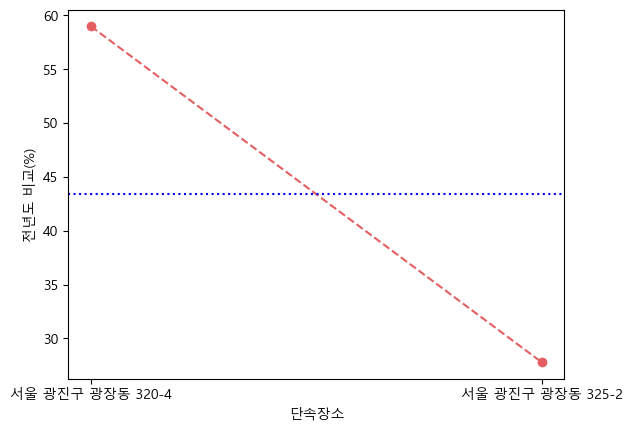

In [259]:
plt.plot(gwangjin_2022_2023_76['단속장소'], gwangjin_2022_2023_76['전년도 비교'],color='#e35f62',
         marker='o', linestyle='--')
plt.xlabel('단속장소')
plt.ylabel('전년도 비교(%)')
plt.axhline(gwangjin_2022_2023_76['전년도 비교'].mean(), color = 'blue' , linestyle = ':' )
plt.show()

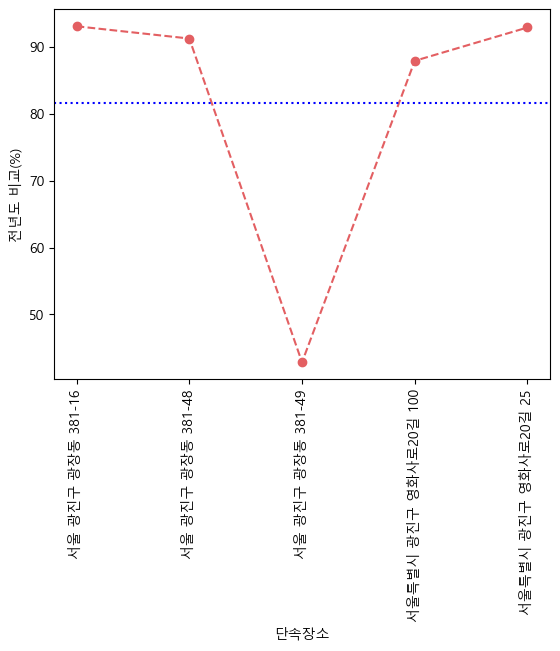

In [265]:
plt.plot(gwangjin_2022_2023_mov['단속장소'], gwangjin_2022_2023_mov['전년도 비교'],color='#e35f62',
         marker='o', linestyle='--')
plt.xticks(rotation = 90)
plt.xlabel('단속장소')
plt.ylabel('전년도 비교(%)')
plt.axhline(gwangjin_2022_2023_mov['전년도 비교'].mean(), color = 'blue' , linestyle = ':' )
plt.show()

In [147]:
gwangjin_2023_PDA_mean

,단속장소,위반내용,위도,경도,노선명(도로명),도로규모,도로폭
0,서울 광진구 광장동 370-3,37,37.551995,127.099809,영화사로,소로2류,폭8-10m
1,서울특별시 광진구 아차산로70길 62,28,37.540161,127.099176,아차산로70길,중로1류,폭20-25m
2,서울 광진구 광장동 5-117,23,37.551338,127.1017,워커힐로,소로2류,폭8-10m
3,서울 광진구 광장동 141-3,22,37.551544,127.11008,아차산로78길,소로1류,폭10-12m
4,서울 광진구 광장동 486-1,21,37.539802,127.099012,아차산로70길,중로1류,폭20-25m
5,서울특별시 광진구 아차산로78길 90,19,37.551002,127.110809,아차산로78길,소로1류,폭10-12m
6,서울특별시 광진구 워커힐로 177,16,37.554716,127.110342,워커힐로,소로2류,폭8-10m
7,서울 광진구 광장동 320-4,16,37.547137,127.107813,아차산로76길,소로2류,폭8-10m
8,서울 광진구 광장동 74,16,37.552464,127.110914,워커힐로,소로2류,폭8-10m
9,서울 광진구 광장동 325-2,13,37.547853,127.10758,아차산로76길,소로2류,폭8-10m


In [148]:
gwangjin_2022_PDA_mean

,단속장소,위반내용,위도,경도,노선명(도로명),도로규모,도로폭
0,서울 광진구 광장동 320-4,156,37.547137,127.107813,아차산로76길,소로2류,폭8-10m
1,서울 광진구 광장동 381-16,115,37.549852,127.099767,영화사로,소로2류,폭8-10m
2,서울 광진구 광장동 486-1,92,37.539802,127.099012,아차산로70길,중로1류,폭20-25m
3,서울 광진구 광장동 381-48,91,37.551843,127.099957,영화사로,소로2류,폭8-10m
4,서울특별시 광진구 아차산로70길 62,89,37.540161,127.099176,아차산로70길,중로1류,폭20-25m
5,서울 광진구 광장동 381-49,84,37.552031,127.099784,영화사로,소로2류,폭8-10m
6,서울 광진구 광장동 325-2,72,37.547853,127.10758,아차산로76길,소로2류,폭8-10m
7,서울특별시 광진구 영화사로20길 100,66,37.550122,127.099971,영화사로,소로2류,폭8-10m
8,서울 광진구 광장동 381-17,65,37.55067,127.100143,영화사로,소로2류,폭8-10m
9,서울 광진구 광장동 5-117,64,37.551338,127.1017,워커힐로,소로2류,폭8-10m


In [151]:
gwangjin_2022_warn_mean

,단속장소,위반내용,위도,경도,노선명(도로명),도로규모,도로폭
0,서울 광진구 광장동 486-1,222,37.539802,127.099012,아차산로70길,중로1류,폭20-25m
1,서울 광진구 광장동 484,125,37.540314,127.099414,아차산로70길,중로1류,폭20-25m
2,서울 광진구 광장동 453-7,71,37.541905,127.10156,아차산로70길,중로1류,폭20-25m
3,서울 광진구 광장동 320-4,61,37.547137,127.107813,아차산로76길,소로2류,폭8-10m


In [152]:
!pip install folium

In [159]:
import folium as m


gwangjin_m = m.Map(
    location=[37.539802, 127.099012],
    #tiles = 'Stamen Terrain',
    zoom_start=15
)

for i in range(len(gwangjin_2022_PDA_mean)):
    marker01 = m.Marker([gwangjin_2022_PDA_mean.loc[i]['위도'], gwangjin_2022_PDA_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'blue'), popup = gwangjin_2022_PDA_mean.loc[i]['단속장소'])
    marker01.add_to(gwangjin_m)
    
for i in range(len(gwangjin_2022_warn_mean)):
    marker02 = m.Marker([gwangjin_2022_warn_mean.loc[i]['위도'], gwangjin_2022_warn_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'pink'), popup = gwangjin_2022_warn_mean.loc[i]['단속장소'])
    marker02.add_to(gwangjin_m)
    
for i in range(len(gwangjin_2023_PDA_mean)):
    marker03 = m.Marker([gwangjin_2023_PDA_mean.loc[i]['위도'], gwangjin_2023_PDA_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'orange'), popup = gwangjin_2023_PDA_mean.loc[i]['단속장소'])
    marker03.add_to(gwangjin_m)   
    
for i in range(len(gwangjang)):
    marker04 = m.Marker([gwangjang.loc[i]['위도'], gwangjang.loc[i]['경도']],
                     icon = m.Icon(color = 'green'), popup = gwangjang.loc[i]['단속지점명'])
    marker04.add_to(gwangjin_m)  
gwangjin_m

https://map.naver.com/v5/search/%EC%95%84%EC%B0%A8%EC%82%B0%EB%A1%9C%2070%EA%B8%B8%2062/address/14148576.702062342,4514740.39357803,%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B4%91%EC%A7%84%EA%B5%AC%20%EC%95%84%EC%B0%A8%EC%82%B0%EB%A1%9C70%EA%B8%B8%2062,new?c=18.21,0,0,0,dha&isCorrectAnswer=true&p=XHuK9vNh0xSO6GbwWlOgZg,-136.5,0.34,80,Float

* 아차산로 70길 / 아차산로 78길

* 안전 신문고 신고는 2022년 많이 나온 구간이 2023년에 줄어 들지 않았음

* 2022년의 PDA 단속이 가장 많았던 아차산로 76길에 대한 신고가 2023년에 줄어든 것을 확인